In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/p/software/juwelsbooster/stages/2020/software/Jupyter/2020.2.6-gcccoremkl-9.3.0-2020.2.254-Python-3.8.5/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import thermal_barrierlife_prediction as tbp

In [4]:
ensemble = tbp.EnsembleEstimator()

In [8]:
ensemble.create_models(
    estimator_args=[
        ('CNN_500', {'data': {}, 'init': {}, 'train': {'epochs': 50}}),
#         ('CNN_200', {'data': {}, 'init': {}, 'train': {'epochs': 200}}),
    ],
    val_sets=[
        ['M-19-074', 'M-19-104'],
        ['M-19-267', 'M-19-269'],
        ['M-19-271', 'M-19-274'],
        ['M-19-276', 'M-19-280'],
        ['M-19-282', 'M-19-284'],
        
        ['M-19-104', 'M-19-267'],
        ['M-19-269', 'M-19-271'],
        ['M-19-274', 'M-19-276'],
        ['M-19-280', 'M-19-282'],
        ['M-19-074', 'M-19-284'],
    ]
)

Epoch 1/50
26/26 - 1s - loss: 7079.3350 - mean_squared_error: 7079.3350 - mean_absolute_error: 70.5040 - val_loss: 4778.3921 - val_mean_squared_error: 4778.3921 - val_mean_absolute_error: 65.0568
Epoch 2/50
26/26 - 0s - loss: 3099.4775 - mean_squared_error: 3099.4775 - mean_absolute_error: 45.6912 - val_loss: 3777.0962 - val_mean_squared_error: 3777.0962 - val_mean_absolute_error: 55.3897
Epoch 3/50
26/26 - 0s - loss: 2813.9189 - mean_squared_error: 2813.9189 - mean_absolute_error: 44.0354 - val_loss: 3678.7673 - val_mean_squared_error: 3678.7673 - val_mean_absolute_error: 53.8958
Epoch 4/50
26/26 - 0s - loss: 2382.9958 - mean_squared_error: 2382.9958 - mean_absolute_error: 40.8846 - val_loss: 2359.0669 - val_mean_squared_error: 2359.0669 - val_mean_absolute_error: 43.2415
Epoch 5/50
26/26 - 0s - loss: 1989.7971 - mean_squared_error: 1989.7971 - mean_absolute_error: 38.2087 - val_loss: 1146.8864 - val_mean_squared_error: 1146.8864 - val_mean_absolute_error: 30.7530
Epoch 6/50
26/26 - 0

In [9]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:         515543       53871      454917        4730        6754      454425
Swap:             0           0           0


In [15]:
preds = []
true = []
sample = []
for model in ensemble.estimators['CNN_500']:
    preds.append(model.predict(list(model.val_data.sample)))
    true.append(model.val_data.lifetime.values)
    sample.append(model.val_data.sample.values)
preds = np.concatenate(preds)
true = np.concatenate(true)
sample = np.concatenate(sample)

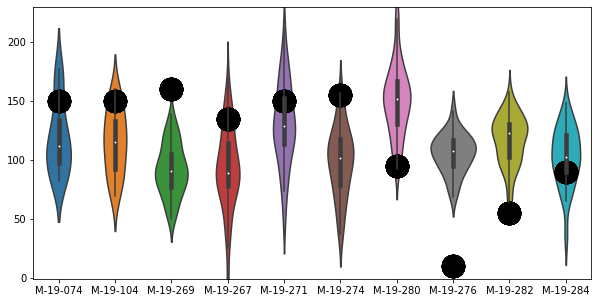

In [25]:
plt.figure(figsize=(10,5))
sns.violinplot(x=sample, y=preds)
# plt.scatter(x=sample, y=preds)
plt.scatter(x=sample, y=true, c='black', s=500)
plt.show()

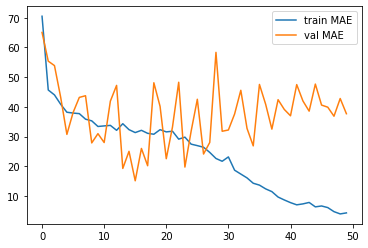

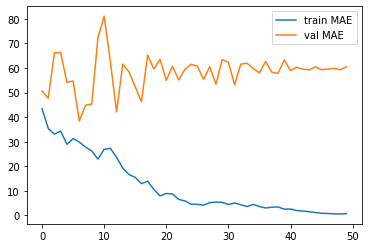

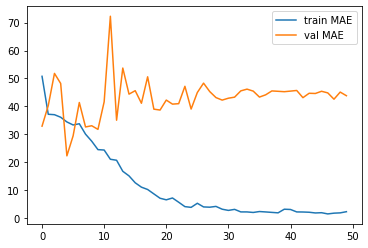

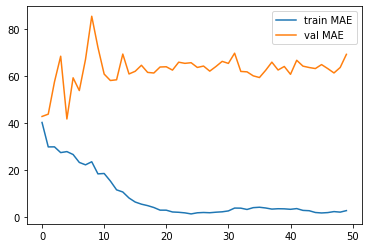

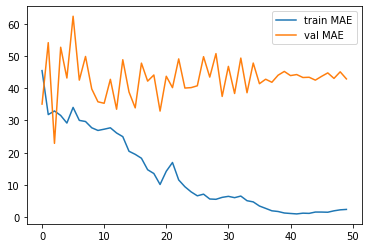

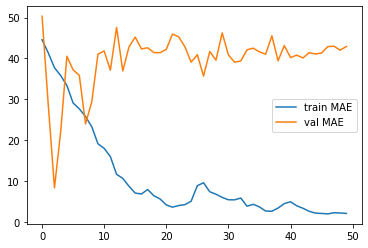

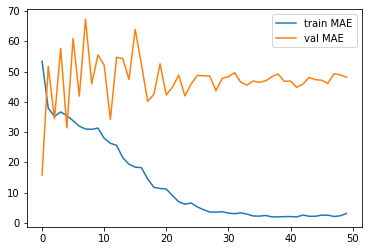

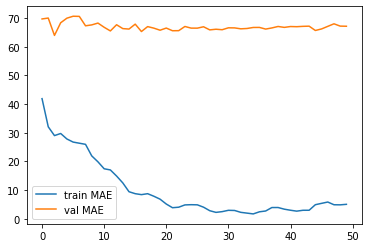

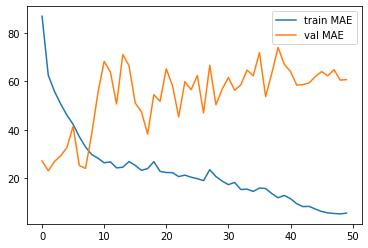

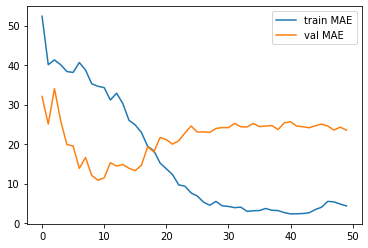

In [26]:
for model in ensemble.estimators['CNN_500']:
    plt.plot(model.history['mean_absolute_error'], label='train MAE')
    plt.plot(model.history['val_mean_absolute_error'], label='val MAE')
    plt.legend()
    plt.show()

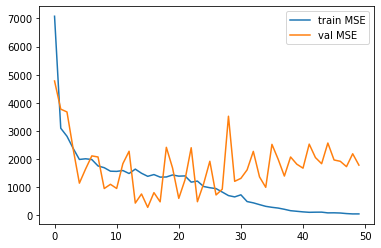

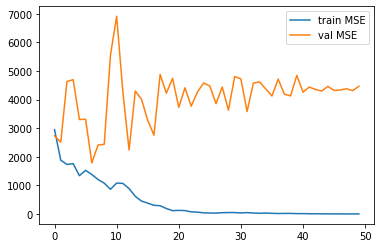

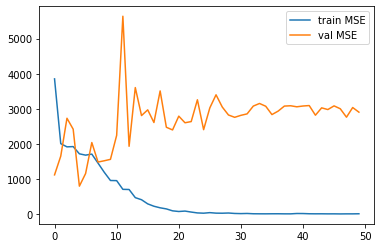

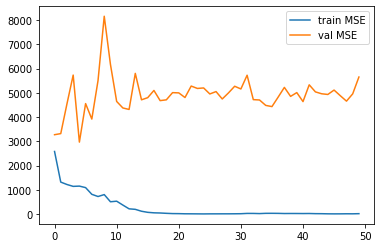

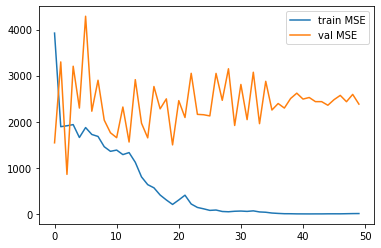

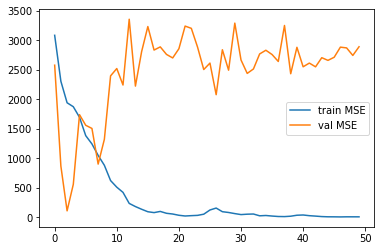

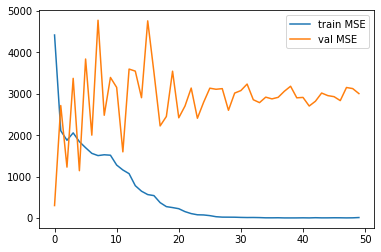

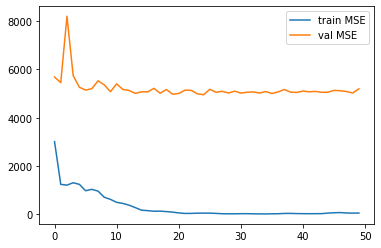

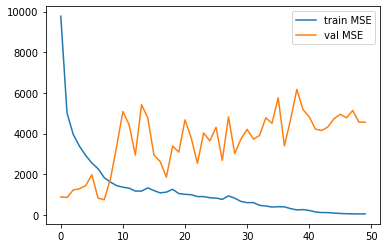

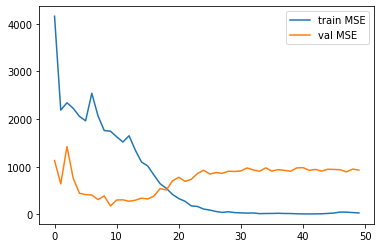

In [27]:
for model in ensemble.estimators['CNN_500']:
    plt.plot(model.history['mean_squared_error'], label='train MSE')
    plt.plot(model.history['val_mean_squared_error'], label='val MSE')
    plt.legend()
    plt.show()